# Notebook for section 3.1

In [1]:
%matplotlib inline
import src.lfw_dataset as lfw
from src.lfw_dataset import LFWDataLoader
from src.siamese import Siamese
from datetime import datetime

# load the paths of the data sets
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()

def try_train(siamese_net, epochs=100, epoch_shuffle=True, verbose=1):
    """
    Try to train the siamese_net model. If success, return train history. Otherwise, return None.
    """
    try:
        print("Training...")
        start_time = datetime.now()
        history = siamese_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, epochs=epochs, epoch_shuffle=epoch_shuffle, verbose=verbose)
        end_time = datetime.now()
        print("Training End")
        print('The training took: {}'.format(end_time-start_time))
        return history
    except Exception as e:
        print(f"Got exception while training: {type(e).__name__}")
        return None

Using TensorFlow backend.


Data already exist


## Original Paper Model (without modifications)

In [2]:
s_net_original_paper = Siamese()
s_net_original_paper.build('paper_network')
print("Original Paper Model:")
s_net_original_paper.model.summary()

history_original = try_train(s_net_original_paper)
if history_original:
    s_net_original_paper.evaluate(history_original, same_test_paths, diff_test_paths)

Original Paper Model:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         605178688   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]    

## Shrink the fully connected layer

Dense size is 512 instead of 4096:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 512)          76692800    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512)          0           sequentia

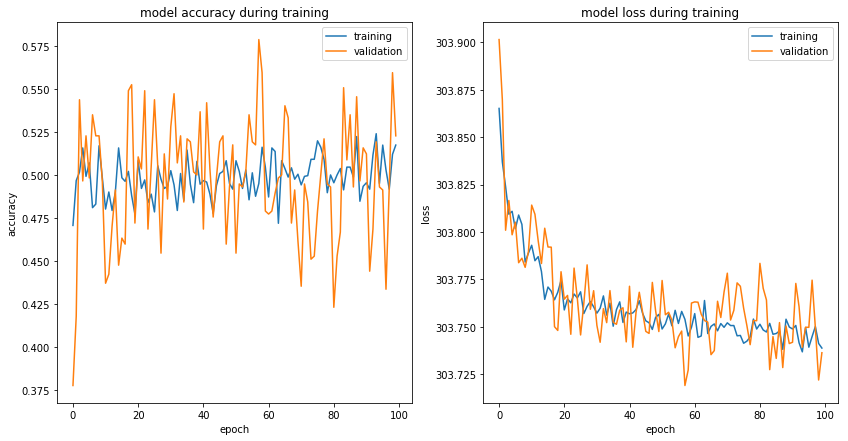

In [2]:
s_net_original_paper_shrink_dense = Siamese()
s_net_original_paper_shrink_dense.build('paper_network', dense_size=512)
print("Dense size is 512 instead of 4096:")
s_net_original_paper_shrink_dense.model.summary()

history_shrink_dense = try_train(s_net_original_paper_shrink_dense)
if history_shrink_dense:
    s_net_original_paper_shrink_dense.evaluate(history_shrink_dense, same_test_paths, diff_test_paths)

## Enlarge filter size at the first layer

Reduce filter size at the first layer
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 4096)         29045312    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 4096)         0           sequen

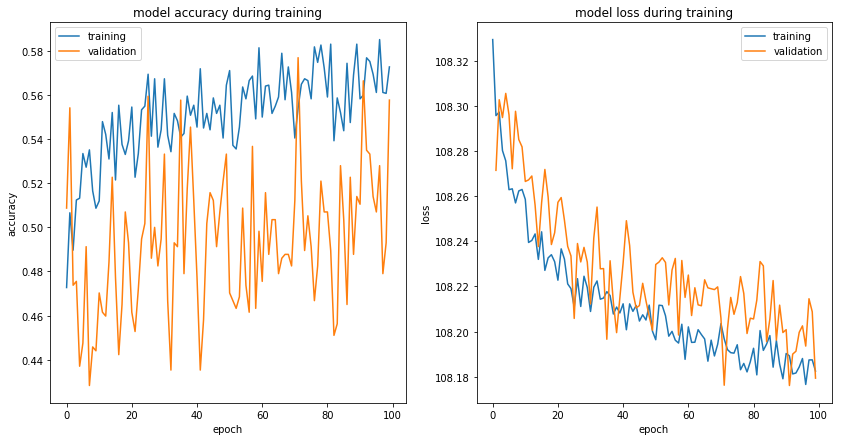

In [3]:
s_net_original_paper_enlarge_filter_size = Siamese()
s_net_original_paper_enlarge_filter_size.build('paper_network', filter_size_conv1=160)
print("Reduce filter size at the first layer")
s_net_original_paper_enlarge_filter_size.model.summary()

history_enlarge_filters = try_train(s_net_original_paper_enlarge_filter_size)
if history_enlarge_filters:
    s_net_original_paper_enlarge_filter_size.evaluate(history_enlarge_filters, same_test_paths, diff_test_paths)